In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
import peakutils

In [12]:
class CurveFitting:
    """
    A class to implement mth order polynomial regression using the least squares method.

    Use the `fit` method to fit the model. Then predict the Y values given X values using\\
    the `predict` method.

    """

    def __init__(self) -> None:
        self.beta = None
        self.stats = None

    def fit(self, X, Y, order=3, plot=False, stats=True):
        """
        Polynomial regression of order m using least squares method.

        Parameters
        ----------
        X : array_like
            Independent variable.
        Y : array_like
            Dependent variable.
        order : int, optional
            Order of the polynomial. Default is 3.
        plot : bool, optional
            If True, plot the regression line. Default is True.
        statistics : bool, optional
            If True, return the statistics. Default is True.

        Returns
        -------
        beta : array_like
            Coefficients of the polynomial regression model.
        stats : dict
            Statistics of the polynomial regression model.
            `r2` : square of correlation coefficient
            `syx` : standard error of the estimate
        """
        self.n = len(X)
        Xis = np.zeros(2 * order + 1)
        Yis = np.zeros(order + 1)
        for i in range(0, 2 * order + 1):
            if i == 0:
                Xis[i] = self.n
                continue
            xi = np.sum(X ** i)
            Xis[i] = xi

        for i in range(1, order + 2):
            yi = np.sum(Y * (X ** (i - 1)))
            Yis[i - 1] = yi
        A = np.zeros((order + 1, order + 1))
        for i in range(0, order + 1):
            A[i] = Xis[i : i + order + 1]
        beta = np.linalg.solve(A, Yis)
        self.beta = beta

        if plot:
            X_l = np.linspace(np.min(X) - np.std(X), np.max(X) + np.std(X), 100)

            def predict(X_l):
                Y_l = 0
                for i in range(0, order + 1):
                    Y_l += beta[i] * X_l ** i
                return Y_l

            Y_l = predict(X_l)
            plt.figure(figsize=(10, 8))
            plt.scatter(X, Y)
            plt.plot(X_l, Y_l, "r")
            plt.xlim(np.min(X) - np.std(X), np.max(X) + np.std(X))
            plt.ylim(np.min(Y) - np.std(Y), np.max(Y) + np.std(Y))
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.show()

        if stats:
            ymean = np.mean(Y)
            y_pred = self.predict(X)
            Sr = np.sum((Y - y_pred) ** 2)
            SYX = np.sqrt(Sr / (self.n - order - 1))
            # r2
            r2 = (np.sum((Y - ymean) ** 2) - Sr) / (np.sum((Y - ymean) ** 2))
            stats = {"r2": r2, "syx": SYX}
            self.stats = stats
            return beta, stats
        else:
            return beta

    def predict(self, X_l):
        """
        Predict the Y values given X values.

        Parameters
        ----------
        X_l : array_like
            Independent variable.

        Returns
        -------
        Y_l : array_like
            Predicted Y values.
        """
        Y_l = np.zeros(len(X_l))
        for i in range(0, len(self.beta)):
            Y_l += self.beta[i] * X_l ** i
        return Y_l

In [13]:
data = pd.read_csv("data2.csv")
X = data["Current"]
Y = data["Voltage"]

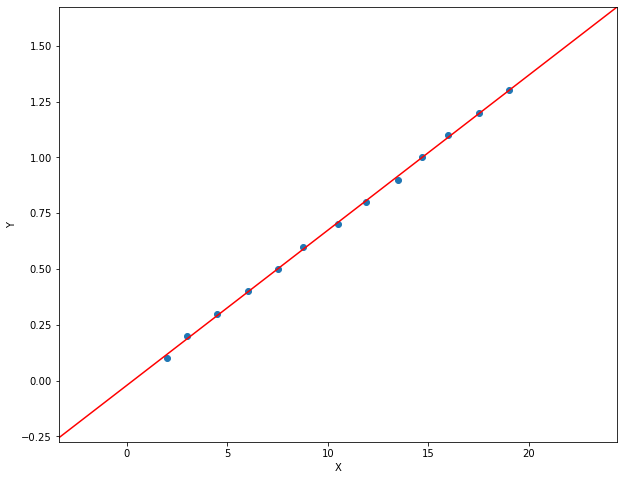

In [14]:
cf = CurveFitting()
beta, stats = cf.fit(X, Y, order=1, plot=True, stats=True)

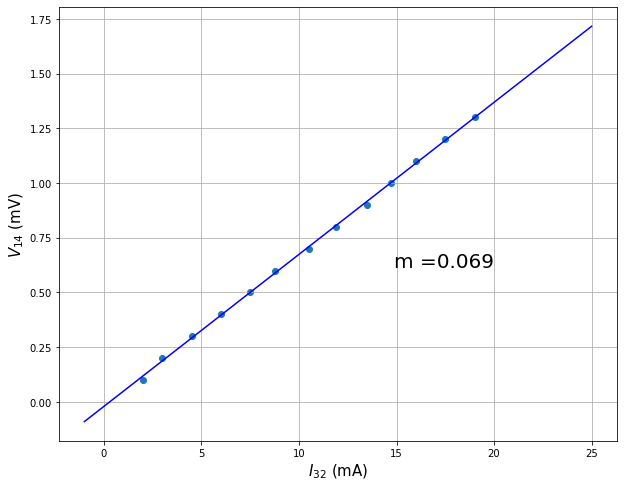

In [16]:
plt.figure(figsize=(10, 8))
# plt.style.use("ggplot")
Xt = np.linspace(-1, 25, 100)
Yt = cf.predict(Xt)
plt.plot(Xt, Yt, "b")
plt.scatter(X, Y)
plt.grid()
plt.annotate(f"m ={beta[1]:.3f}", xy=(0.6, 0.4), xycoords="axes fraction", fontsize=20)
plt.xlabel(r"$I_{32}$ (mA)", fontsize=15)
plt.ylabel("$V_{14}$ (mV)", fontsize=15)
plt.savefig("plot2.pdf",dpi=200)